In [1]:
%matplotlib inline
import seaborn
import quandl
import pandas as pd
import seaborn as sns
from pymongo import MongoClient
from datetime import datetime
from arctic import Arctic
import statsmodels.api as sm
token="Us3wFmXGgAj_1cUtHAAR"

import pylab
pylab.rcParams['figure.figsize'] = (24, 18)

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [2]:
markets=pd.read_csv('contracts.csv',index_col=0)

In [3]:
price_names=['Last','Settle','Last Price','Pre Settlement','Settlement Price',
             'Close','Previous Settlement']
illiquid=[]
df=pd.DataFrame()
df['ES']=quandl.get("CHRIS/CME_ES1", authtoken=token).Last
for index, row in markets.iterrows():
    try:
        m = row.Code
        data=quandl.get(m, authtoken=token)
        if data.max().Volume < 5000:
            print 'Too little volume: ' + index
            illiquid.append(m)
        for p in price_names:
            if p in data.columns:
                df[index]=data[p]
    except:
        print m
        print quandl.get(m, authtoken=token).columns
    

Too little volume: TecDAX
CHRIS/CBOE_VX1
Index([u'Open', u'High', u'Low', u'Close', u'Settle', u'Change',
       u'Total Volume', u'EFP', u'Prev. Day Open Interest'],
      dtype='object')
Too little volume: Ibovespa
Too little volume: Milk
Too little volume: Milling Wheat
Too little volume: BEL 20
Too little volume: Singapore 180
Too little volume: Singapore 380
Too little volume: Termal Coal
CHRIS/ASX_AP1
Index([u'Previous Settlement'], dtype='object')
CHRIS/ASX_BB1
Index([u'Previous Settlement'], dtype='object')
CHRIS/ASX_IR1
Index([u'Previous Settlement'], dtype='object')
Too little volume: European 3.5% Fuel Oil Barges
Too little volume: Ethanol
Too little volume: Butter
Too little volume: Cheese
Too little volume: Ethanol (Chicago)
Too little volume: Milk Class 3
Too little volume: Ethanol (Chicago2)
Too little volume: Commodities Index
Too little volume: Lumber
Too little volume: AP14 Richards Bay
Too little volume: API2 Coal
Too little volume: Rough Rice
Too little volume: API 

/Users/mrefermat/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


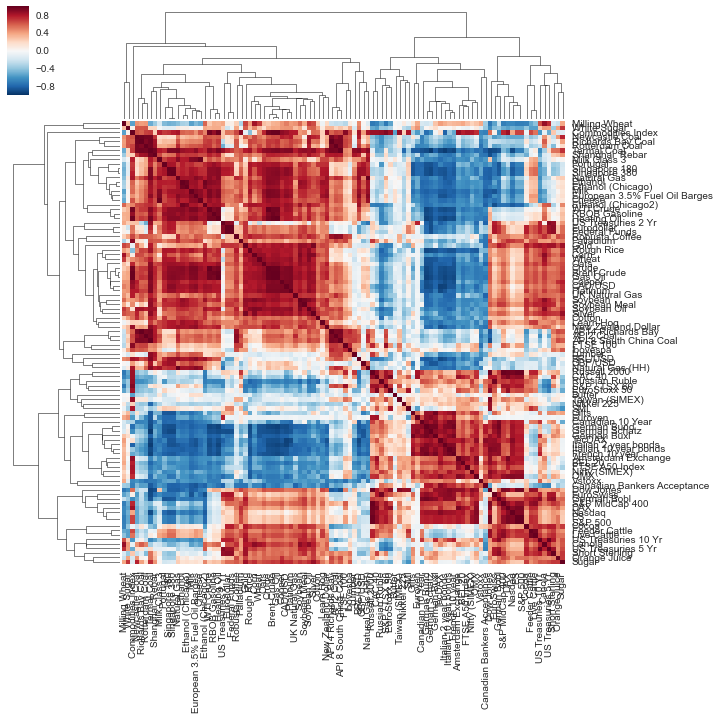

In [4]:
sns.clustermap(df.corr())

In [5]:
df.to_csv('liquid_contracts.csv')

In [6]:
volume = pd.DataFrame()
for index, row in markets.iterrows():
    try:
        volume[index]=quandl.get(row.Code, authtoken=token).Volume
    except:
        print index

VIX Futures
Australia SPI 200
NZ Bank Bills
Australia Accepted Bills


In [7]:
volume.to_csv('volume_data.csv')

In [8]:
df.corr().to_csv('test.csv')

In [9]:
fx_map={'AUD':'DEXUSAL',
'BRL':'DEXBZUS',
'GBP':'DEXUSUK',
'CAD':'DEXCAUS',
'CNY':'DEXCHUS',
'DKK':'DEXDNUS',
'EUR':'DEXUSEU',
'HKD':'DEXHKUS',
'INR':'DEXINUS',
'JPY':'DEXJPUS',
'MYR':'DEXMAUS',
'MXN':'DEXMXUS',
'TWD':'DEXTAUS',
'NZD':'DEXUSNZ',
'NOK':'DEXNOUS',
'SGD':'DEXSIUS',
'ZAR':'DEXSFUS',
'KRW':'DEXKOUS',
'LKR':'DEXSLUS',
'SEK':'DEXSDUS',
'CHF':'DEXSZUS',
'THB':'DEXTHUS',
'VEF':'DEXVZUS'}

In [10]:
fx=pd.DataFrame()

for m,ticker in fx_map.items():
    fx[m]=quandl.get("FRED/" + ticker,authtoken=token).VALUE

/Users/mrefermat/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...).last()
  if __name__ == '__main__':


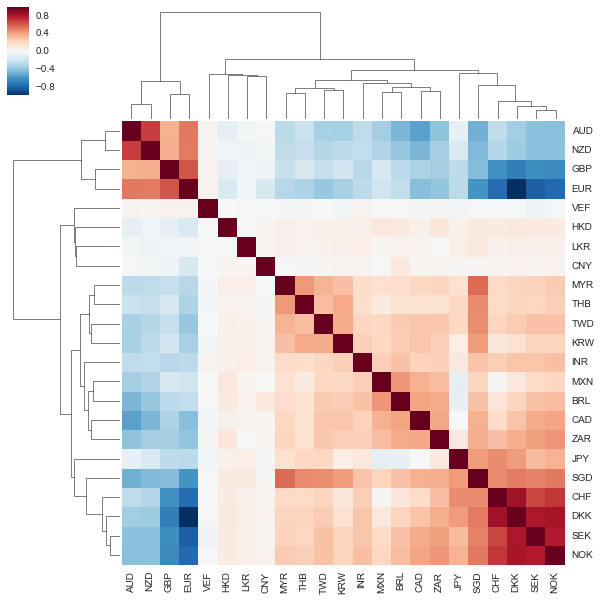

In [11]:
sns.clustermap(fx.resample(rule='w',how='last').pct_change().corr())

In [12]:
fx.EUR.dropna().head()

DATE
1999-01-04    1.1812
1999-01-05    1.1760
1999-01-06    1.1636
1999-01-07    1.1672
1999-01-08    1.1554
Name: EUR, dtype: float64

In [13]:
fx.to_csv('currency.csv')